## import des bibliothèques utiles 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### import et ouverture du dataset

In [6]:
df = pd.read_csv('total.csv', index_col=0)
df.head(10)

,date,titre,budget,recette,duree,genres,synopsis,tagline,realisateur,casting,compagnies_production,suite,production_countries,langues,imdb_id,vote_average,vote_count,status
0,2014-11-12,Dumb and Dumber To,40000000,169837010,110,['Comedy'],"20 years since their first adventure, Lloyd an...",The average person uses 10% of their brain cap...,"['Bobby Farrelly', 'Peter Farrelly']","['Jim Carrey', 'Jeff Daniels', 'Laurie Holden'...","['New Line Cinema', 'Universal Pictures', 'Con...",3,['US'],['en'],tt2096672,5.542,2740,Released
1,2004-11-11,Марс,2000000,240000,100,"['Comedy', 'Drama']","Somewhere deep, deep in Russia there is a town...",NaN,['Anna Melikyan'],"['Nana Kiknadze', 'Artur Smolyaninov', 'Yevgen...","['Central Partnership', 'Studio SLON']",1,['RU'],['ru'],tt0417949,5.700,3,Released
2,2014-01-22,"I, Frankenstein",65000000,76801179,92,"['Horror', 'Thriller']","200 years after his shocking creation, Dr. Fra...","In the battle between good and evil, an immort...",[],"['Aaron Eckhart', 'Yvonne Strahovski', 'Bill N...","['Lakeshore Entertainment', 'Sidney Kimmel Ent...",1,"['AU', 'US']",['en'],tt1418377,5.272,1628,Released
3,2014-03-20,Captain America: The Winter Soldier,170000000,714766572,136,"['Action', 'Adventure', 'Science Fiction']",After the cataclysmic events in New York with ...,In heroes we trust.,"['Anthony Russo', 'Joe Russo']","['Chris Evans', 'Scarlett Johansson', 'Sebasti...",['Marvel Studios'],2,['US'],['en'],tt1843866,7.678,16638,Released
4,2013-09-11,Vikingdom,15600000,747872,114,['Adventure'],A warrior fleeing the violence of his past mus...,Live by the Sword.,[],"['Dominic Purcell', 'Natassia Malthe', 'Craig ...",['KRU Studios'],1,['MY'],"['en', 'zh']",tt1785669,4.380,54,Released
5,2012-03-15,Тот ещё Карлосон!,4000000,9938268,80,"['Comedy', 'Fantasy', 'Family']","The hero of Mikhail Galustyan, known in our wo...",NaN,['Sarik Andreasyan'],"['Mikhail Galustyan', 'Igor Vernik', 'Mariya S...",['Enjoy Movies'],1,['RU'],['ru'],tt2288121,3.400,24,Released
6,1976-04-05,The Blue Bird,12000000,887000,95,"['Adventure', 'Family', 'Fantasy', 'Drama']","A pair of peasant children, Mytyl and her brot...",NaN,['George Cukor'],"['Elizabeth Taylor', 'Jane Fonda', 'Ava Gardne...","['20th Century Fox', 'Lenfilm', 'Sovinfilm', '...",1,"['RU', 'US']",['en'],tt0074225,6.000,25,Released
7,1986-06-13,Mona Lisa,0,5794184,105,"['Crime', 'Drama', 'Romance']",George is a small-time crook just out of priso...,Sometimes love is a strange and wicked game.,['Neil Jordan'],"['Bob Hoskins', 'Cathy Tyson', 'Michael Caine'...","['HandMade Films', 'Palace Productions']",1,['GB'],['en'],tt0091538,6.855,173,Released
8,1997-04-03,The Saint,68000000,118063304,116,"['Thriller', 'Action', 'Romance', 'Science Fic...","Simon Templar (The Saint), is a thief for hire...",Never reveal your name. Never turn your back. ...,['Phillip Noyce'],"['Val Kilmer', 'Elisabeth Shue', 'Rade Šerbedž...","['Paramount', 'Mace Neufeld Productions', 'Rys...",1,['US'],"['en', 'ru']",tt0120053,6.100,940,Released
9,2006-05-23,Desperation,12000000,0,131,"['Drama', 'Fantasy', 'Horror', 'Thriller', 'My...","When a sheriff arrests a writer, a family, a c...","In this town, there are no accidents.",[],"['Steven Weber', 'Tom Skerritt', 'Charles Durn...","['Buena Vista Pictures', 'Touchstone Televisio...",1,['US'],['en'],tt0129871,5.565,162,Released


### fonction permettant de transformer les données en string dans le DataFrame en liste de string pour faciliter leurs manipulations

In [7]:
list_keys = ['genres', 'production_countries', 'realisateur', 'casting', 'compagnies_production', 'langues']

def str_to_list(df, key):
    df_new = df

    for k in key: #on parcourt les clés à modifier spécifiées en argument de la fonction

        for ind in range(df_new.shape[0]): #on parcourt toutes les lignes du Dataframe

            string = df_new[k].iloc[ind] #on récupère la valeur à modifier pour chaque ligne

            if type(string) == str : # on vérifie si c'est bien une string
                
                #création de la nouvelle variable de type liste qui remplacera l'ancienne

                liste_finale = []

                #remplissage de la variable de type liste en faisant des opérations sur la string

                list_string = string[1:-1].split(',')
                for i,j in enumerate(list_string):
                    if i == 0:
                        mot = j[1:-1]
                        if mot not in liste_finale:
                            liste_finale.append(mot)
                    else:
                        mot = j[2:-1]
                        if mot not in liste_finale:
                            liste_finale.append(mot)
                
                #affectation de la nouvelle valeur de type liste à l'élément modifié du Dataframe

                df_new.at[ind,k] = liste_finale

    return df_new


### Fonction pour mettre en forme le synopsis pour faciliter son étude

In [8]:
def suppr_caractere_string(string):

    chars = ['.', ',', '!','?', ':', ';', "'", '"', '(', ')', '[', ']', '{', '}', '-'] 
 
    new_string = string.translate(str.maketrans('', '', ''.join(chars)))

    return new_string

In [14]:
string = "agree, allow, answer, ask, be, become, begin, believe, borrow, bring, build, buy, call, carry, change = changer choose = choisir close = fermer come = venir cut = couper decide = décider do = faire dream = rêver drink = boire drive = conduire eat = manger explain = expliquer fall = tomber feel = sentir, ressentir fill = remplir find = trouver finish = finir follow = suivre fly = voler forget = oublier get = get"

l2 = string.split(' ')
print(l2)
l = []
for i in range(0,len(l2),3):
    l.append(l2[i])
print(l)

['agree', '=', 'être', 'd’accord', 'allow', '=', 'permettre', 'answer', '=', 'répondre', 'ask', '=', 'demander', 'be', '=', 'être', 'become', '=', 'devenir', 'begin', '=', 'commencer', 'believe', '=', 'croire', 'borrow', '=', 'emprunter', 'bring', '=', 'apporter', 'build', '=', 'construire', 'buy', '=', 'acheter', 'call', '=', 'appeler', 'carry', '=', 'porter', 'change', '=', 'changer', 'choose', '=', 'choisir', 'close', '=', 'fermer', 'come', '=', 'venir', 'cut', '=', 'couper', 'decide', '=', 'décider', 'do', '=', 'faire', 'dream', '=', 'rêver', 'drink', '=', 'boire', 'drive', '=', 'conduire', 'eat', '=', 'manger', 'explain', '=', 'expliquer', 'fall', '=', 'tomber', 'feel', '=', 'sentir,', 'ressentir', 'fill', '=', 'remplir', 'find', '=', 'trouver', 'finish', '=', 'finir', 'follow', '=', 'suivre', 'fly', '=', 'voler', 'forget', '=', 'oublier', 'get', '=', 'get']
['agree', 'd’accord', 'permettre', 'répondre', 'demander', 'être', 'devenir', 'commencer', 'croire', 'emprunter', 'apporter'

In [ ]:
def suppr_elem_list(liste):
    
    list_elem_to_suppr = ['', 'the', 'be','to', 'of', 'and', 'a', 'in', 'that', 'have', 'I', 'i', 'it', 'for', 'not', 'on', 'with', 'he', 'as', 'you', 'do', 'at', 'this', 'but', 'his', 'by', 'from','they', 'we', 'say', 'her', 'she', 'or', 'an', 'will', 'my', 'one', 'all', 'would', 'there', 'their', 'what','so', 'up', 'out','if', 'about', 'who', 'get', 'which', 'go', 'me', 'when', 'make', 'can', 'like', 'time', 'no', 'just', 'him', 'know', 'take', 'people', 'into', 'year', 'your', 'good', 'some', 'could', 'them', 'see', 'other', 'than', 'then', 'now', 'look', 'only', 'come', 'its', 'over', 'think', 'also', 'back', 'after', 'use', 'two', 'how', 'our', 'work', 'first', 'well', 'way :', 'even', 'new', 'want', 'because', 'any', 'these', 'give', 'day', 'most', 'us']

    new_list = liste

    for elem in list_elem_to_suppr:

        new_list = list(filter((elem).__ne__, new_list))

    return new_list


In [ ]:
def mise_en_forme_synopsis(df):
    
    df_new = df

    for i in range(df_new.shape[0]):

        synopsis_brut = df_new.synopsis.iloc[i]

        if type(synopsis_brut) == str:

            syn_sans_ponct = suppr_caractere_string(synopsis_brut)

            syn_sans_maj = syn_sans_ponct.lower()

            synopsis_list = syn_sans_maj.split(' ')

            new_synopsis_list = suppr_elem_list(synopsis_list)

            df_new.at[i, 'synopsis'] = new_synopsis_list
    
    return df_new

### Application de la fonction précédente pour créer un nouveau dataset

In [ ]:
dataset = str_to_list(df, list_keys)
dataset_new = mise_en_forme_synopsis(dataset)

In [ ]:
for i in range(10):
    print(dataset_new.synopsis.iloc[i])

['20', 'years', 'since', 'adventure', 'lloyd', 'harry', 'road', 'trip', 'find', 'harrys', 'newly', 'discovered', 'daughter', 'was', 'given', 'adoption']
['somewhere', 'deep', 'deep', 'russia', 'is', 'town', 'called', 'marks', 'named', 'karl', 'marks', 'founder', 'communism', 'theory', 'where', 'are', 'working', 'toy', 'factory', 'receiving', 'wages', 'toys', 'news', 'cities', 'are', 'arriving', 'very', 'rare', 'occasion', 'morning', 'boris', 'former', 'boxing', 'is', 'running', 'something', 'wakes', 'train', 'four', 'letters', 'mar_s', 'steps', 'starts', 'meet', 'gregori', 'young', 'man', 'dream', 'is', 'love', 'local', 'librarian', 'greta', 'whose', 'dream', 'is', 'godforgotten', 'town', 'each', 'step', 'is', 'meeting', 'past', 'is', 'hard', 'escape']
['200', 'years', 'shocking', 'creation', 'dr', 'frankensteins', 'creature', 'adam', 'still', 'walks', 'earth', 'finds', 'himself', 'middle', 'war', 'fate', 'humanity', 'adam', 'discovers', 'holds', 'key', 'destroy', 'humankind']
['catacl

### Fonction permettant de compter le nombre de film par genre en renvoyant un dicitonnaire

In [ ]:
def nb_film_genre(df):

    dico_genre = {}

    for i in range(df.shape[0]):

        list_genre = df.iloc[i].genres

        for genre in list_genre:

            if genre in list(dico_genre.keys()):
                dico_genre[genre] += 1

            else:
                dico_genre[genre] = 1
                
    return dico_genre

### Fonction permettant de compter le nombre de film en fonction du mois de sortie

In [ ]:
def nb_film_mois(df):

    dico_mois = {} #créaction d'un dictionnaire pour stoker le nombre de film par mois

    df['date'] = pd.to_datetime(df['date']) #modification du format de la date de string à datetime64[ns]

    for i in range(df.shape[0]): #parcourt de toutes les lignes du DataFrame

        mois_de_sortie = df['date'].dt.month_name().iloc[i] #récupération du mois de sortie à partir de la date

        if type(mois_de_sortie) == str : #vérification que le mois de sorti est bien une string pour ne pas avoir de problème avec une clés nan
             
            # comptage du mois de sorti dans le dictionnaire 
            if mois_de_sortie in list(dico_mois.keys()):
                dico_mois[mois_de_sortie] += 1
            else:
                dico_mois[mois_de_sortie] = 1

    return dico_mois

### Fonction permettant d'afficher la recette moyenne des films par mois de sorti

In [ ]:
def recette_mois(df):
    recette_mois = {}

    df['date'] = pd.to_datetime(df['date']) #modification du format de la date de string à datetime64[ns]
    
    for i in range(df.shape[0]): #parcourt de toutes les lignes du DataFrame

        mois_de_sortie = df['date'].dt.month_name().iloc[i] #récupération du mois de sortie à partir de la date

        if type(mois_de_sortie) == str : #vérification que le mois de sorti est bien une string pour ne pas avoir de problème avec une clés nan
             
            # ajout de la recette du film en fonction du mois de sortie dans le dictionnaire 
            if mois_de_sortie in list(recette_mois.keys()):
                recette_mois[mois_de_sortie] += df['recette'].iloc[i]
            else:
                recette_mois[mois_de_sortie] = df['recette'].iloc[i]
        
    nb_film = nb_film_mois(df) #récupération du nombre de film par mois
        
        #pour chaque mois on divise la somme des recettes par le nombre de films
    for mois in list(recette_mois.keys()):
        recette_mois[mois] = recette_mois[mois]/nb_film[mois]
        
    return recette_mois


### Fonction permettant de calculer le nombre de film par pays de production

In [ ]:
def nb_film_pays(df):
    
    dico_pays_prod = {} #créaction d'un dictionnaire pour stoker le nombre de film par pays de production

    for i in range(df.shape[0]): #parcourt de toutes les lignes du DataFrame

        pays_prod_list = df['production_countries'].iloc[i] #récupération des pays de production

        for pays in pays_prod_list : #on parcourt les pays de production d'un film

            # comptage du pays de production dans le dictionnaire
            if pays in list(dico_pays_prod.keys()):
                dico_pays_prod[pays] += 1
            else:
                dico_pays_prod[pays] = 1

    return dico_pays_prod

### Fonction permettant d'afficher un dictionnaire sous forme de bar chart

In [ ]:
def dict_to_bar(dict):
    labels = list(dict.keys())
    x = list(dict.values())
    plt.figure(figsize=(20,20))
    plt.bar(labels, x)
    plt.show()

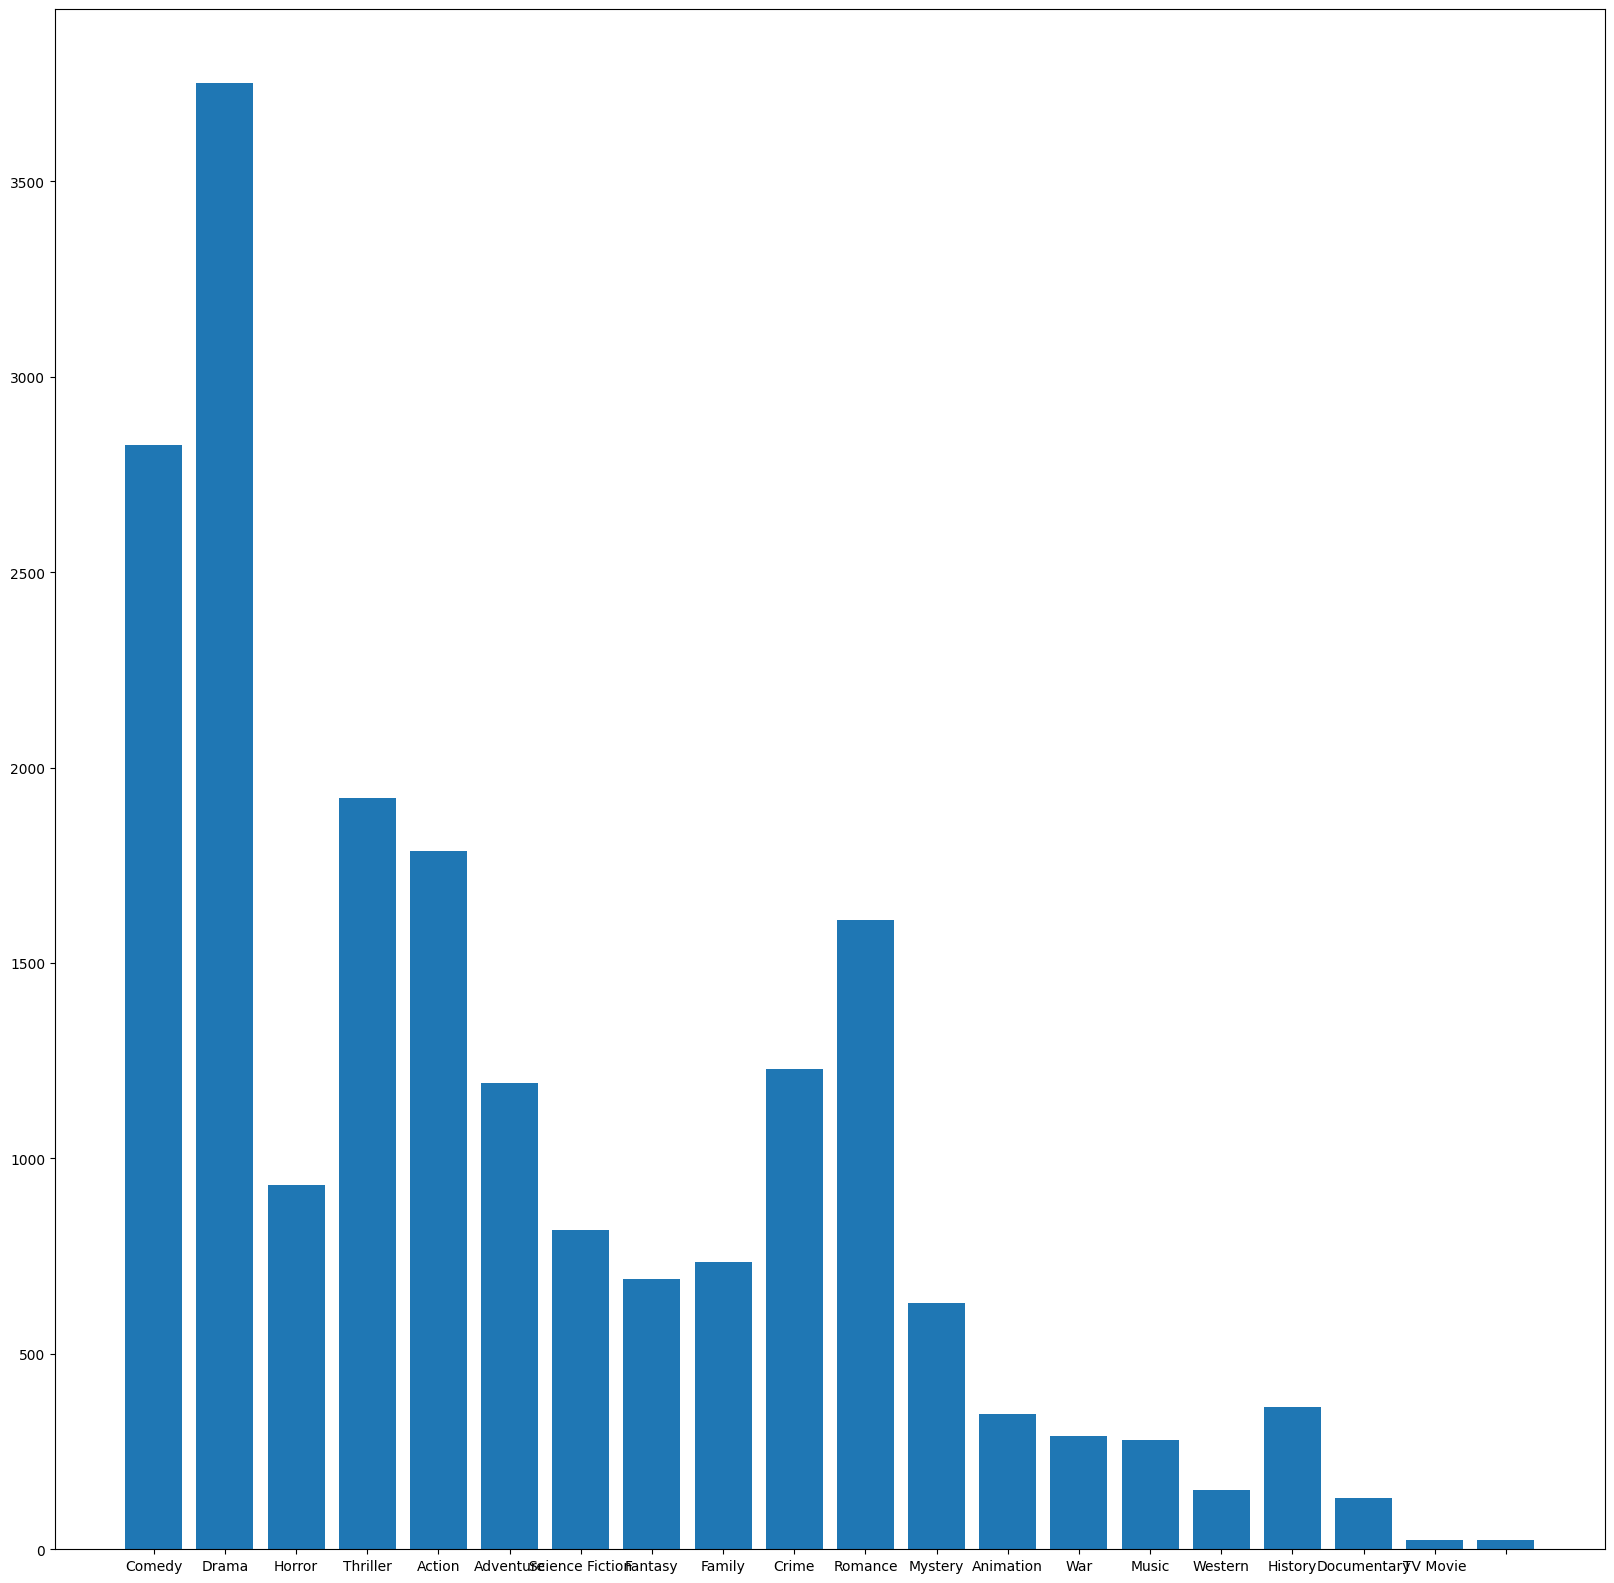

In [ ]:
dico_genre = nb_film_genre(dataset)
dict_to_bar(dico_genre)

{'US': 5833, 'RU': 104, 'AU': 148, 'MY': 7, 'GB': 944, 'CA': 350, 'RO': 21, 'DE': 552, 'FR': 610, 'MX': 53, 'CZ': 35, 'AT': 24, 'ZA': 26, 'CH': 24, 'BE': 62, 'KR': 57, 'CN': 61, 'ES': 154, 'TH': 17, 'JP': 212, 'IE': 57, 'NZ': 34, 'IT': 215, 'SE': 70, 'HU': 30, 'HK': 100, 'LU': 26, 'NL': 57, 'SG': 10, 'MO': 1, 'TW': 14, 'GR': 9, 'FI': 20, 'DK': 55, 'IN': 282, 'BG': 10, 'NO': 31, 'PL': 22, 'VN': 3, 'MA': 8, 'BS': 4, 'SU': 8, 'AR': 19, 'BR': 27, 'CL': 5, 'PE': 7, 'LI': 1, '': 83, 'CS': 1, 'TR': 20, 'PK': 1, 'IL': 12, 'TN': 2, 'YU': 6, 'KZ': 1, 'CU': 1, 'NA': 2, 'PH': 9, 'HR': 2, 'MT': 4, 'BT': 1, 'ID': 2, 'IR': 7, 'LT': 3, 'AW': 4, 'JM': 1, 'PT': 6, 'AE': 13, 'UA': 5, 'IS': 7, 'AF': 2, 'SK': 3, 'DZ': 3, 'PS': 2, 'UY': 3, 'PY': 1, 'EC': 1, 'CO': 2, 'DJ': 1, 'SI': 3, 'PA': 1, 'LB': 3, 'KH': 1, 'KW': 1, 'LY': 2, 'SA': 1, 'EE': 2, 'NI': 1, 'VE': 2, 'MC': 1, 'AO': 1, 'MK': 1, 'BY': 2, 'BA': 2, 'RS': 2, 'ML': 1, 'BF': 1, 'ET': 1, 'GH': 1, 'CI': 1, 'UG': 1, 'QA': 2, 'EG': 1, 'BW': 1, 'XC': 1, 'X

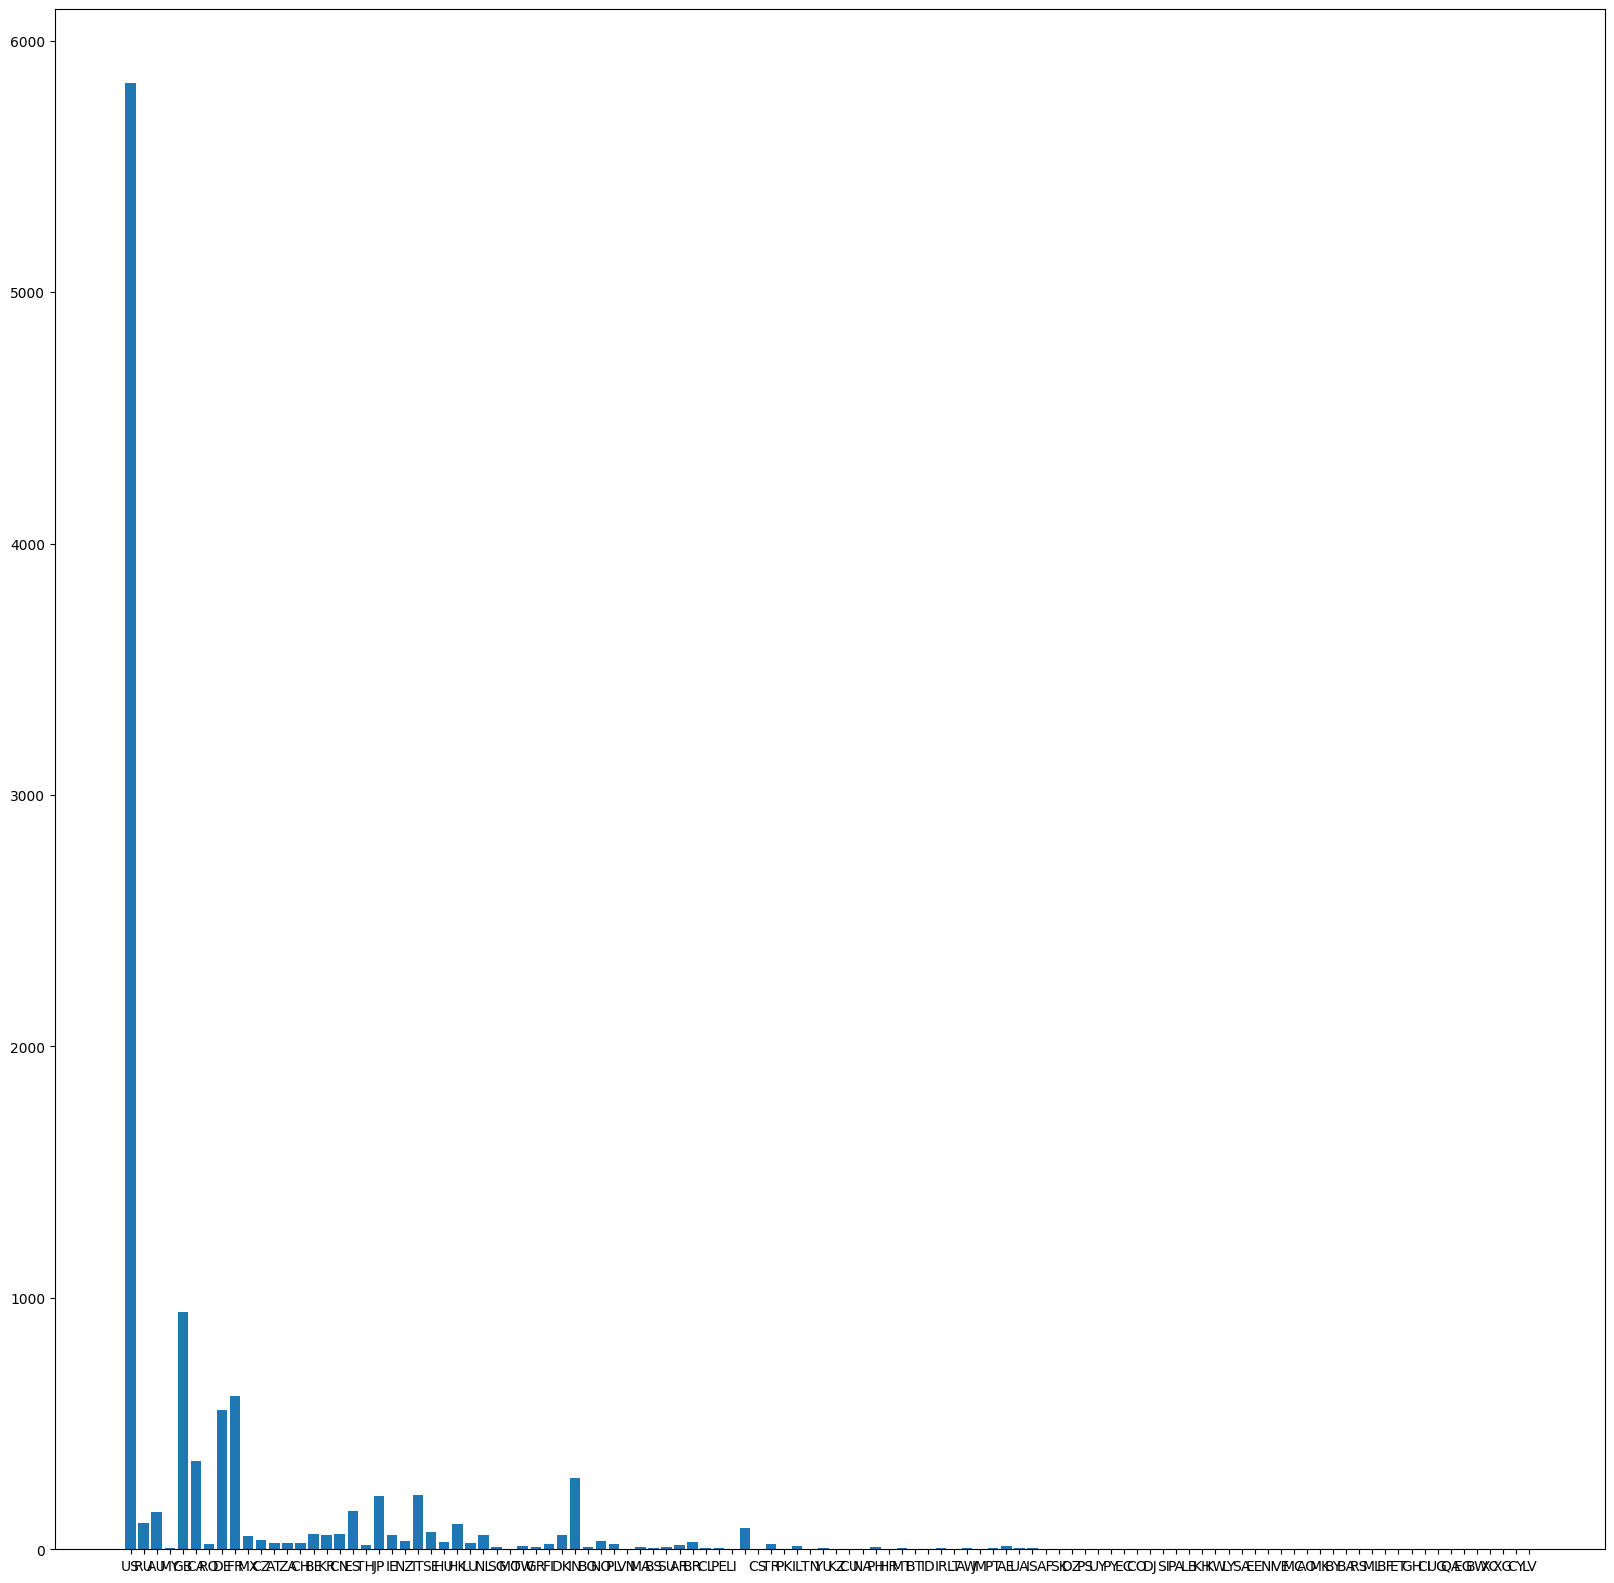

In [ ]:
dico = nb_film_pays(dataset)
print(dico)
dict_to_bar(dico)